<a href="https://colab.research.google.com/github/MartinVIllesca/Ramos-Redes/blob/master/CC7221/tarea2/tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# cargar dataset
!unzip './drive/My Drive/dataCC7221/tarea2/orand-car-with-bbs.zip'

Streaming output truncated to the last 5000 lines.
  inflating: orand-car-with-bbs/training/images/0198_1148918_202446.png  
  inflating: orand-car-with-bbs/training/images/0489_5207294_228320.png  
  inflating: orand-car-with-bbs/training/images/0045_0372889_287060.png  
  inflating: orand-car-with-bbs/training/images/0332_6254282_116068.png  
  inflating: orand-car-with-bbs/training/images/0963_3801246_497131.png  
  inflating: orand-car-with-bbs/training/images/0910_2309994_216000.png  
  inflating: orand-car-with-bbs/training/images/0136_1965273_239100.png  
  inflating: orand-car-with-bbs/training/images/0711_0053757_114240.png  
  inflating: orand-car-with-bbs/training/images/0185_0508987_129472.png  
  inflating: orand-car-with-bbs/training/images/0543_0689066_262000.png  
  inflating: orand-car-with-bbs/training/images/0103_0189763_322800.png  
  inflating: orand-car-with-bbs/training/images/0300_0541996_170850.png  
  inflating: orand-car-with-bbs/training/images/0356_1386777_

In [7]:
# visualizacion de algunas imagenes
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.patches as patches
import csv
import urllib
import cv2


In [8]:
def viewImageWAnnotations(path_im, annotations, axs):
  # print(img_path, annotations)
  # img = read_image_bgr(path_im)
  # img = preprocess_image(img)
  img = cv2.imread(path_im)

  axs.imshow(img)
  for annot in annotations:
    rect = patches.Rectangle((annot[1],annot[2]),annot[3],annot[4],linewidth=1,edgecolor='r',facecolor='none')
    axs.add_patch(rect)
  # axs.set_title(annotations)
  return img

def getAnnotation(path_annot):
  annotation = []
  path_annot = path_annot.split('.')[0] + '.txt'

  try:
    with open(path_annot) as file:
      lines = [line.strip() for line in file]
      _lines = [tuple(line.rstrip().split(':')) for line in lines]
      annotation.append([[int(l[0].strip())] + [int(j.strip()) for j in l[1].split(',')] for l in _lines])
    return annotation[0]
  except Exception as e:
    print(e)
    return []

In [9]:
dir_path = 'orand-car-with-bbs/'
training_path = os.path.join(dir_path, 'training/')
training_images = os.path.join(training_path, 'images/')
training_annotations = os.path.join(training_path, 'annotations/')

images_path = [f for f in os.listdir(training_images) if os.path.isfile(os.path.join(training_images, f))]
annotations = [getAnnotation(os.path.join(training_annotations, path_img)) for path_img in images_path]


[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_7414781_16986.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/0359_0145675_94611.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/0172_9712473_32662.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_7565275_3046.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_3710351_2975.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_5563682_17437.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_7215738_2902.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_4946162_2828.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_344591_9255.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_7784333_409.t

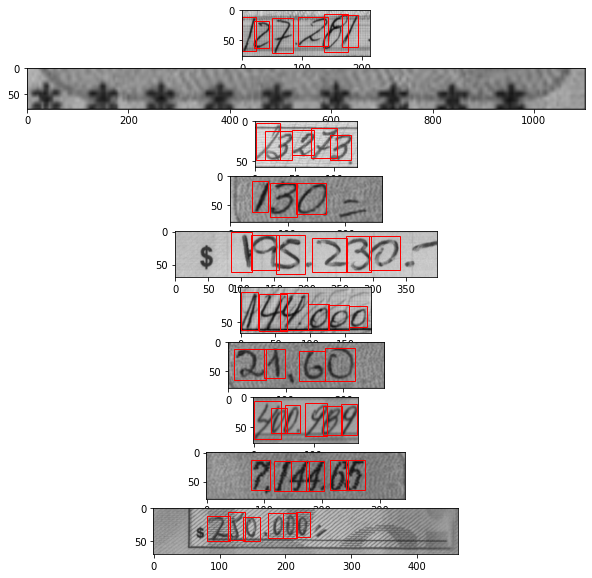

In [10]:
# visualizacion de algunas imagenes
fig, axs = plt.subplots(10, 1, figsize=(10,10))
for i, img_path in enumerate(images_path[:10]):
  img_path = os.path.join(training_images, img_path)
  annot = annotations[i]
  viewImageWAnnotations(img_path, annot, axs[i])

In [7]:
ANNOTATIONS_FILE = 'annotations.csv'
CLASSES_FILE = 'classes.csv'

In [8]:
annotations2write = []
classes2write = set([])

for i, img_path in enumerate(images_path):
  img_path = os.path.join(training_images, img_path)
  annot = annotations[i]
  if len(annot) > 0:
    for a in annot:
      x1 = a[1]
      y1 = a[2]
      x2 = x1 + a[3]
      y2 = y1 + a[4]
      if x1 >= 0 and y1 >= 0:
        annotations2write.append([img_path, x1, y1, x2, y2, a[0]])
        classes2write.add('{}'.format(a[0]))

print(len(annotations2write))
print(len(classes2write))

with open(ANNOTATIONS_FILE, 'w') as f:
  writer = csv.writer(f)
  writer.writerows(annotations2write)

with open(CLASSES_FILE, 'w') as f:
  for i, line in enumerate(classes2write):
    f.write('{},{}\n'.format(i,i))

31487
10


In [9]:
!git clone https://github.com/MartinVIllesca/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 5876 (delta 4), reused 12 (delta 4), pack-reused 5862
Receiving objects: 100% (5876/5876), 13.52 MiB | 1.88 MiB/s, done.
Resolving deltas: 100% (3952/3952), done.


In [10]:
%cd keras-retinanet/

!pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=170576 sha256=f42051c1654e9024ab665d2f21c97ced7ec619dbbcf1adc684c4e2dcdcac16ca
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13346 sha256=d863b42db424498429281e0b7acf86718a79ac8512b525fa1399a5394a624137
  Stored in directory: /root/.cache/pip/wheels/80/dd/ac/842235b63dddac12faa4b48ebe58b8944e8c2e57c2e38dddb6
Successfully built keras-retinanet keras-resnet


In [11]:
!python setup.py build_ext --inplace

running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/keras_retinanet
creating build/temp.linux-x86_64-3.6/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -c keras_retinanet/utils/compute_overlap.c -o build/temp.linux-x86_64-3.6/keras_retinanet/utils/compute_overlap.o
In file included from /usr/local/lib/python3.6/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1832:0,
                 from /usr/local/lib/python3.6/dist-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /usr/local/lib/python3.6/dist-packages/numpy/core/include/numpy/arrayobject.h:4,
 

In [12]:
!pwd
%cd ..

/content/keras-retinanet
/content


In [1]:
PRETRAINED_MODEL = './drive/My Drive/dataCC7221/tarea2/last/resnet18_csv_25.h5'
# PRETRAINED_MODEL = '/content/drive/My\ Drive/dataCC7221/tarea2/resnet18_csv_06_1.h5'

# URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet101_oid_v1.0.0.h5'
# URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
# urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to ./drive/My\ Drive/dataCC7221/tarea2/last/resnet18_csv_16.h5


In [2]:
!keras-retinanet/keras_retinanet/bin/train.py --backbone resnet18 --lr 0.00001 --initial-epoch 16 --snapshot-path ./drive/My\ Drive/dataCC7221/tarea2/last/ --weights {PRETRAINED_MODEL} --multiprocessing --batch-size 8 --steps 500 --epochs 25 csv annotations.csv classes.csv

Using TensorFlow backend.
2020-07-18 19:24:41.599960: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Creating model, this may take a second...
Loading resnet18
2020-07-18 19:24:43.658064: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-18 19:24:43.698050: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-18 19:24:43.698622: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-07-18 19:24:43.698664: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcud

In [1]:
%cp -r ./snapshots/ ./drive/My\ Drive/dataCC7221/tarea2/

In [3]:
import matplotlib as mp
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import cv2
from tqdm import tqdm
import os
import random
import numpy as np
import matplotlib.pyplot as plt


In [4]:
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image


In [5]:

model = models.load_model('./drive/My Drive/dataCC7221/tarea2/last/resnet18_csv_25.h5', backbone_name='resnet18')
model = models.convert_model(model)

Using TensorFlow backend.


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

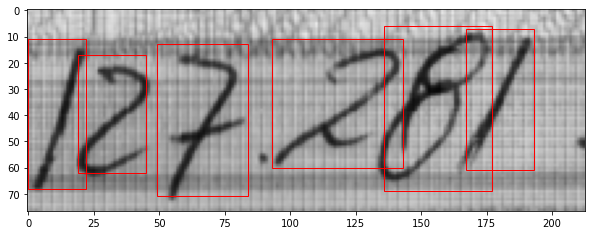

[[  0.6109518   8.156725   22.679157   68.46138  ]
 [ 18.161072   17.852953   48.39406    64.725334 ]
 [ 50.39753     9.986757   83.8898     71.89322  ]
 [ 91.06253     8.580427  142.61012    62.66901  ]
 [135.09627     4.614998  176.23138    66.27059  ]
 [135.3064      5.2861004 175.80261    65.760895 ]
 [165.59003     7.0975876 193.75241    60.43477  ]]
[0.6590299  0.6149271  0.70673877 0.55564284 0.67116684 0.63963234
 0.5195712 ]
[1 2 7 2 8 0 1]


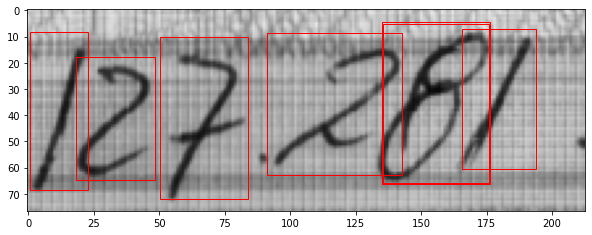

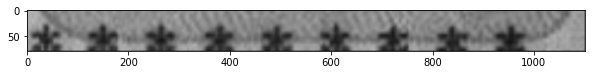

[]
[]
[]


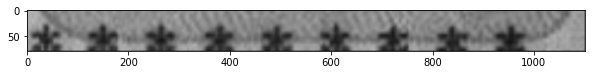

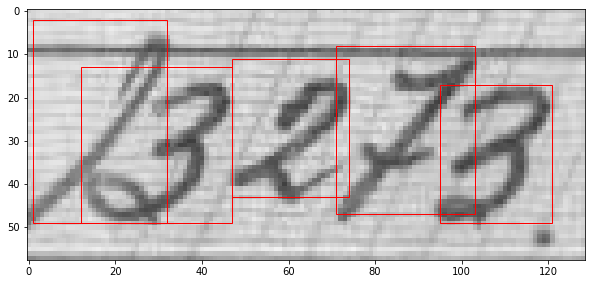

[[ 11.950902    7.137292   44.99146    50.49658  ]
 [ 71.52453     6.5932307 101.68356    48.261967 ]
 [ 93.85853    10.824376  122.93901    49.152035 ]]
[0.5897957  0.52858675 0.50060177]
[3 7 5]


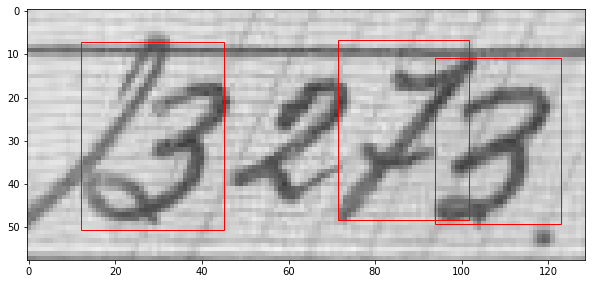

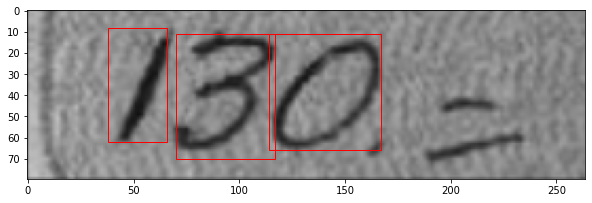

[[ 38.632202   8.900605  70.506256  62.84225 ]
 [ 68.23295    9.538784 116.378876  66.32164 ]
 [115.29816   11.798533 168.65381   67.98238 ]]
[0.8678205  0.55292267 0.908928  ]
[1 5 0]


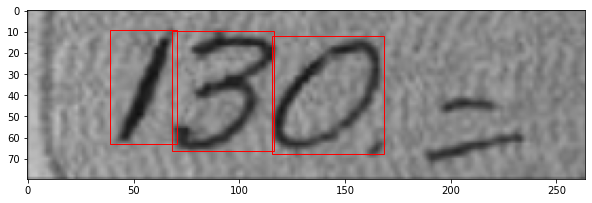

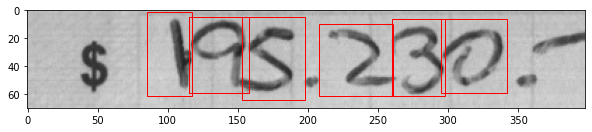

[[ 94.9463      3.9009435 121.17586    57.023674 ]
 [117.765       5.0699553 156.88634    55.4431   ]
 [148.552       7.63183   194.72946    59.12541  ]
 [212.42262     9.882873  261.72247    57.48206  ]
 [298.22995    10.248171  341.79242    58.284294 ]]
[0.5349664  0.71529907 0.55006766 0.50111425 0.9477397 ]
[1 9 5 5 0]


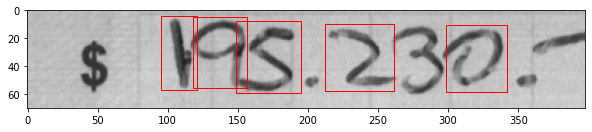

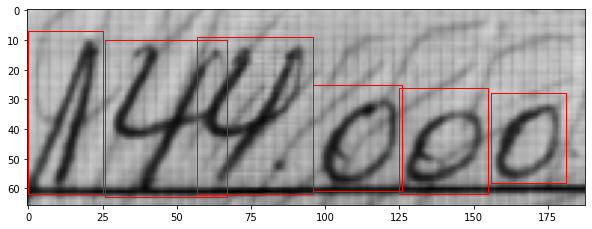

[[  0.4404665   6.752153   25.091541   62.23619  ]
 [ 26.938942    6.803887   65.51653    62.275013 ]
 [ 58.27069     8.286457   94.37973    60.751537 ]
 [ 96.7163     19.238638  126.45802    61.598797 ]
 [ 97.32341    25.158623  125.90101    60.6901   ]
 [125.96107    28.32764   155.15736    59.803864 ]
 [155.75156    28.106802  180.8859     57.698437 ]]
[0.78481984 0.59244186 0.53670347 0.5677005  0.77009445 0.8250829
 0.90824217]
[1 4 4 6 0 0 0]


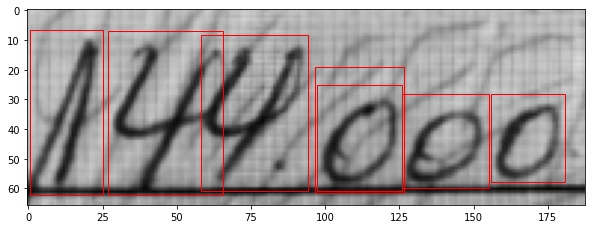

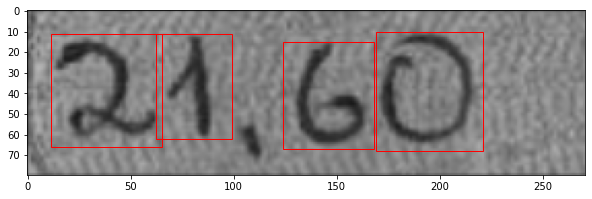

[[ 10.537481  13.076485  63.48576   62.435463]
 [ 66.54335   10.324063  95.956894  63.49076 ]
 [127.81288   15.031812 164.96843   66.19362 ]
 [170.31201    8.897521 219.48126   66.08601 ]]
[0.60832924 0.8036714  0.84586763 0.7955964 ]
[2 1 6 0]


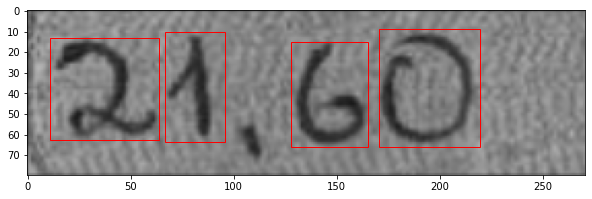

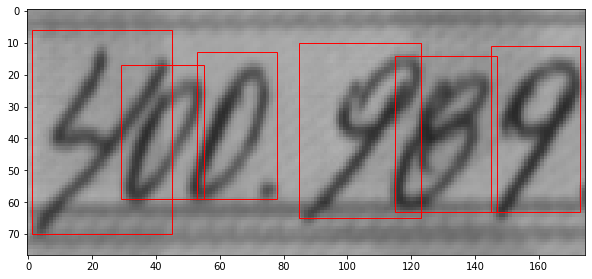

[[  1.6593091   9.322762   42.221214   69.54856  ]
 [ 30.232876   15.462353   54.606567   63.024574 ]
 [ 51.07562    13.513987   77.59674    60.814526 ]
 [114.7839     16.117043  145.1371     63.96759  ]]
[0.5130805  0.7105958  0.82727784 0.6953902 ]
[4 0 0 0]


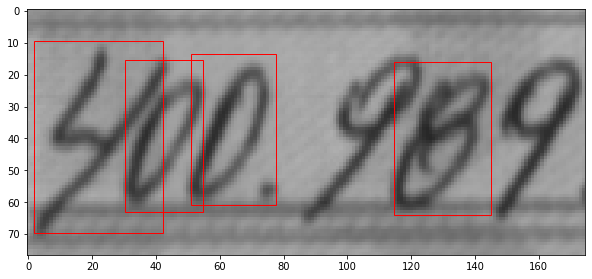

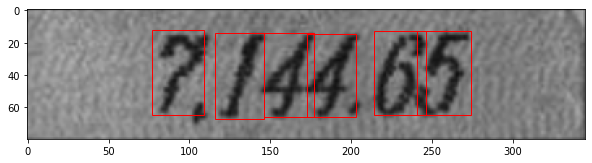

[[ 76.788376  13.5618   112.142784  66.2016  ]
 [117.096405  11.872587 146.87782   67.28669 ]
 [144.98116   11.018649 176.52058   67.75557 ]
 [171.95343   13.313329 206.4325    66.90551 ]
 [172.12485   13.873947 206.73659   66.979004]
 [212.72653   13.464057 245.59406   66.28709 ]
 [241.62021   11.490102 275.68002   66.35541 ]]
[0.53177136 0.8507937  0.64544404 0.60109526 0.5616509  0.8297094
 0.6878401 ]
[7 1 4 4 1 0 5]


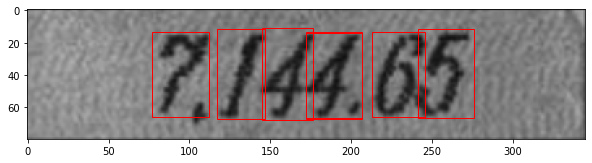

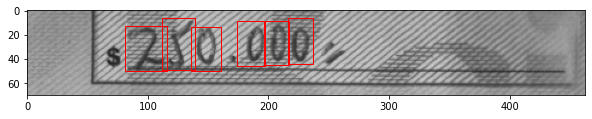

[[ 46.939537   4.339699  79.83593   63.95019 ]
 [ 80.85218    9.63208  110.38875   52.910027]
 [136.04143    8.183199 160.29967   50.315857]
 [178.04404    9.043098 198.90471   48.48854 ]
 [198.27548    8.796192 217.52267   47.04713 ]
 [216.5181     9.193428 238.21497   45.95226 ]]
[0.5259834  0.5645966  0.89849335 0.7391435  0.8197387  0.7100692 ]
[4 2 0 0 0 0]


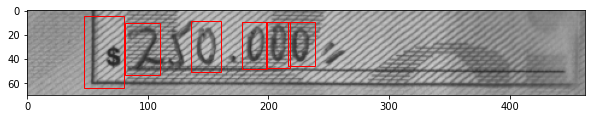

In [28]:
umbral = 0.5

for i, img_path in enumerate(images_path[:10]):
  img_path = os.path.join(training_images, img_path)
  annot = annotations[i]
  fig, axs = plt.subplots(1, 1, figsize=(10,10))
  image = viewImageWAnnotations(img_path, annot, axs)
  plt.show()

  try:
    if image.shape[2] != 3: break
  except Exception as e:
    print(e)
    continue

  image = read_image_bgr(img_path)
  image2 = cv2.imread(img_path)
  fig, axs = plt.subplots(1,1, figsize=(10,10))
  image = preprocess_image(image)
  axs.imshow(image2)
  image, scale = resize_image(image)

  boxes, scores, labels = model.predict(np.expand_dims(image, axis=0))
  boxes /= scale
  boxes = boxes[0]
  scores = scores[0]
  labels = labels[0]

  orden = np.where(scores > umbral)[0]
  orden = [x for _,x in sorted(zip([x[0] for x in boxes[orden]], orden))]

  for box in boxes[orden]:
    rect = patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],linewidth=1,edgecolor='r',facecolor='none')
    axs.add_patch(rect)

  print(boxes[orden])
  print(scores[orden])
  print(labels[orden])
  plt.show()
  # print(np.where(scores > umbral)[0])